<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/ML_With_Python/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_%EB%85%B8%EB%93%9C9_%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%B2%98%EB%A6%AC(%ED%95%A9%EC%84%B1%EA%B3%B1_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# CNN(Convolutional Neural Networks)
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# 데이터셋 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# shape 변경
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# 정규화 (0~1 사이)
X_train, X_test = X_train / 255.0, X_test / 255.0

#모델
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 3*3 커널(필터) 적용, 합성곱 레이어의 크기는 28 - 3 + 1 = 26, 26 * 26이고 model.summary()에서 확인 가능
    MaxPooling2D((2, 2)), # 플링 레이어의 크기는 26 / 2 = 13, 13 * 13이고 model.summary()에서 확인 가능
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'), # 뉴런의 개수
    Dense(10, activation='softmax') # 0~9 숫자 따라서 예측값 개수는 10개
])

# 모델 요약
model.summary()

# 모델 컴파일, 딥러닝 모델을 학습시키기 위한 데이터를 처리하고, 모델의 구조를 생성하고, 모델의 파라미터를 최적화하는 과정
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# 학습(fit) 과정을 시각화하기 과정를 저장
#history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3) # epochs=10 기간 많이 걸림 epochs=5 테스트

# 합성곱 레이어 층 및 Epochs 조건 변경 테스트
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(64, activation='relu'), # 뉴런의 개수
#     Dense(10, activation='softmax') # 0~9 숫자 따라서 예측값 개수는 10개
# ])

# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
# 합성곱 2, epochs 10
# Epoch 1/10
# 1875/1875 [==============================] - 70s 36ms/step - loss: 0.4575 - accuracy: 0.8342 - val_loss: 0.3937 - val_accuracy: 0.8561
# Epoch 2/10
# 1875/1875 [==============================] - 66s 35ms/step - loss: 0.3062 - accuracy: 0.8875 - val_loss: 0.3121 - val_accuracy: 0.8879
# Epoch 3/10
# 1875/1875 [==============================] - 64s 34ms/step - loss: 0.2612 - accuracy: 0.9050 - val_loss: 0.3019 - val_accuracy: 0.8900
# Epoch 4/10
# 1875/1875 [==============================] - 64s 34ms/step - loss: 0.2303 - accuracy: 0.9145 - val_loss: 0.2690 - val_accuracy: 0.9032
# Epoch 5/10
# 1875/1875 [==============================] - 64s 34ms/step - loss: 0.2055 - accuracy: 0.9229 - val_loss: 0.2690 - val_accuracy: 0.9050
# Epoch 6/10
# 1875/1875 [==============================] - 65s 35ms/step - loss: 0.1854 - accuracy: 0.9304 - val_loss: 0.2560 - val_accuracy: 0.9054
# Epoch 7/10
# 1875/1875 [==============================] - 67s 35ms/step - loss: 0.1673 - accuracy: 0.9376 - val_loss: 0.2587 - val_accuracy: 0.9086
# Epoch 8/10
# 1875/1875 [==============================] - 66s 35ms/step - loss: 0.1483 - accuracy: 0.9443 - val_loss: 0.2636 - val_accuracy: 0.9123
# Epoch 9/10
# 1875/1875 [==============================] - 65s 34ms/step - loss: 0.1345 - accuracy: 0.9499 - val_loss: 0.2673 - val_accuracy: 0.9104
# Epoch 10/10
# 1875/1875 [==============================] - 68s 36ms/step - loss: 0.1217 - accuracy: 0.9549 - val_loss: 0.2923 - val_accuracy: 0.9119
#
# 합성곱 2, epochs 5
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
# Epoch 1/5
# 1875/1875 [==============================] - 68s 36ms/step - loss: 0.4640 - accuracy: 0.8315 - val_loss: 0.3565 - val_accuracy: 0.8721
# Epoch 2/5
# 1875/1875 [==============================] - 64s 34ms/step - loss: 0.3105 - accuracy: 0.8870 - val_loss: 0.3118 - val_accuracy: 0.8884
# Epoch 3/5
# 1875/1875 [==============================] - 81s 43ms/step - loss: 0.2645 - accuracy: 0.9025 - val_loss: 0.2766 - val_accuracy: 0.8974
# Epoch 4/5
# 1875/1875 [==============================] - 67s 35ms/step - loss: 0.2332 - accuracy: 0.9141 - val_loss: 0.2708 - val_accuracy: 0.9028
# Epoch 5/5
# 1875/1875 [==============================] - 66s 35ms/step - loss: 0.2095 - accuracy: 0.9225 - val_loss: 0.2561 - val_accuracy: 0.9030
#
# 합성곱 3, epochs 5
# Epoch 1/5
# 1875/1875 [==============================] - 75s 39ms/step - loss: 0.6017 - accuracy: 0.7778 - val_loss: 0.4686 - val_accuracy: 0.8262
# Epoch 2/5
# 1875/1875 [==============================] - 70s 37ms/step - loss: 0.4066 - accuracy: 0.8499 - val_loss: 0.4000 - val_accuracy: 0.8521
# Epoch 3/5
# 1875/1875 [==============================] - 69s 37ms/step - loss: 0.3472 - accuracy: 0.8709 - val_loss: 0.3577 - val_accuracy: 0.8691
# Epoch 4/5
# 1875/1875 [==============================] - 69s 37ms/step - loss: 0.3120 - accuracy: 0.8855 - val_loss: 0.3376 - val_accuracy: 0.8754
# Epoch 5/5
# 1875/1875 [==============================] - 67s 36ms/step - loss: 0.2843 - accuracy: 0.8945 - val_loss: 0.3159 - val_accuracy: 0.8857
#
# 합성곱 3, epochs 10
# Epoch 1/10
# 1875/1875 [==============================] - 71s 37ms/step - loss: 0.6136 - accuracy: 0.7770 - val_loss: 0.4779 - val_accuracy: 0.8269
# Epoch 2/10
# 1875/1875 [==============================] - 71s 38ms/step - loss: 0.4121 - accuracy: 0.8499 - val_loss: 0.4124 - val_accuracy: 0.8504
# Epoch 3/10
# 1875/1875 [==============================] - 69s 37ms/step - loss: 0.3526 - accuracy: 0.8724 - val_loss: 0.3572 - val_accuracy: 0.8685
# Epoch 4/10
# 1875/1875 [==============================] - 67s 35ms/step - loss: 0.3146 - accuracy: 0.8846 - val_loss: 0.3335 - val_accuracy: 0.8801
# Epoch 5/10
# 1875/1875 [==============================] - 68s 36ms/step - loss: 0.2911 - accuracy: 0.8924 - val_loss: 0.3220 - val_accuracy: 0.8821
# Epoch 6/10
# 1875/1875 [==============================] - 80s 42ms/step - loss: 0.2687 - accuracy: 0.9008 - val_loss: 0.3172 - val_accuracy: 0.8860
# Epoch 7/10
# 1875/1875 [==============================] - 69s 37ms/step - loss: 0.2502 - accuracy: 0.9069 - val_loss: 0.2983 - val_accuracy: 0.8935
# Epoch 8/10
# 1875/1875 [==============================] - 68s 36ms/step - loss: 0.2362 - accuracy: 0.9124 - val_loss: 0.3325 - val_accuracy: 0.8860
# Epoch 9/10
# 1875/1875 [==============================] - 69s 37ms/step - loss: 0.2202 - accuracy: 0.9185 - val_loss: 0.3131 - val_accuracy: 0.8918
# Epoch 10/10
# 1875/1875 [==============================] - 67s 36ms/step - loss: 0.2082 - accuracy: 0.9232 - val_loss: 0.3090 - val_accuracy: 0.8948



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 1, 1, 64)        

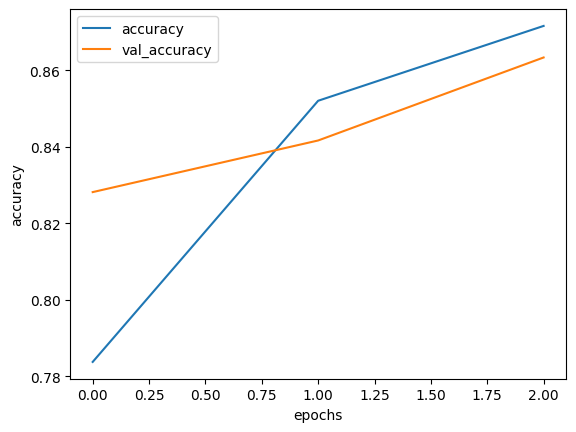

In [10]:
# 학습 과정 정확성 검증을 위한 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

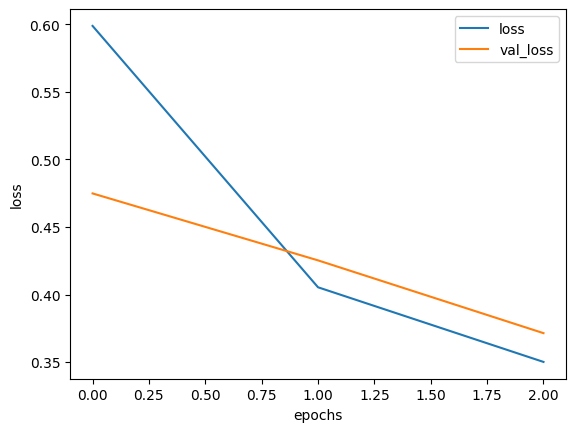

In [11]:
# 학습 과정 손실 확인 위한 시각화
# epochs=10인 경우 7 이후 증가 즉 과적합 이슈 발생하는 듯해 epochs=5로 변경
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

313/313 [==============================] - 3s 10ms/step


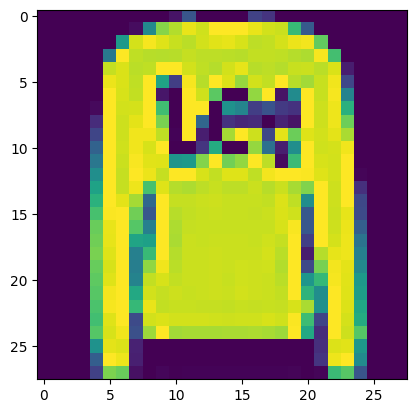

In [6]:
import numpy as np

# 레이블, 정답 데이터 숫자를 인덱스로 한 리스트 생성
classes = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat" ,"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 예측
pred = model.predict(X_test)
type(pred)
pred[1]

# 가장 높은 값 찾기, np.argmax()는 데이터 중 가장 큰 값의 인덱스를 반환
np.argmax(pred[1])

# 예축한 레이블(정답)
classes[np.argmax(pred[1])]

# 실제 레이블(정답)
classes[y_test[1]]

# 검증 데이터 확인(이미지)
plt.imshow(X_test[1])